In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 2*x**2 + 4*x - 5

In [3]:
f(2)

11

In [4]:
xs = np.arange(-5,5,0.5)
ys = f(xs)

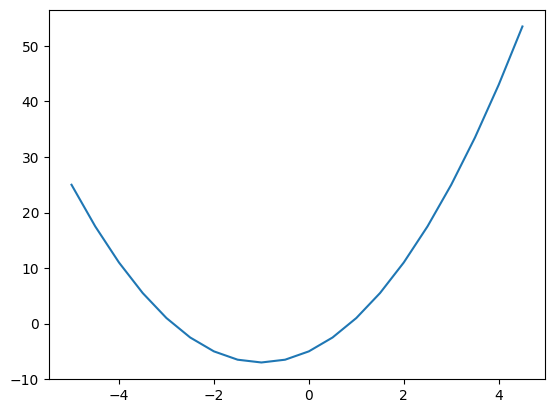

In [5]:
plt.plot(xs,ys)

In [8]:
a = 3
b = -4
c = 15

d = a*b + c

In [9]:
print(d)

3


In [12]:
# we will nudge the values of a,b and c with h(small value) and see the behaviour or d

h = 0.001
a = 3
b = -4
c = 15


d1 = a*b + c
a = a+h # increasing a
d2 = a*b + c

print("d1",d1)
print("d2",d2)
print("slope", (d2 - d1)/h)


print("here we can see when the value of a is incresed only by a bit the slope is -ve")

d1 3
d2 2.9960000000000004
slope -3.9999999999995595
here we can see when the value of a is incresed only by a bit the slope is -ve


In [14]:
h = 0.001
a = 3
b = -4
c = 15


d1 = a*b + c
b = b+h # increasing b
d2 = a*b + c

print("d1",d1)
print("d2",d2)
print("slope", (d2 - d1)/h)

print("here we can see when the value of b is increased only by a bit the slope is +ve")

d1 3
d2 3.003
slope 3.0000000000001137
here we can see when the value of b is increased only by a bit the slope is +ve


In [15]:
h = 0.001
a = 3
b = -4
c = 15


d1 = a*b + c
c = c+h # increasing c
d2 = a*b + c

print("d1",d1)
print("d2",d2)
print("slope", (d2 - d1)/h)

print("here we can see when the value of c is increased only by a bit the slope is +ve")

d1 3
d2 3.0009999999999994
slope 0.9999999999994458
here we can see when the value of c is increased only by a bit the slope is +ve


In [34]:
class Value:
    
    def __init__(self,data):
        self.data = data
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out = Value(self.data + other.data) # why Value(self.data+other.data) because we want the 
        #return type to be Value
        return out
    
    def __mul__(self,other):
        mul = Value(self.data*other.data)
        return mul

In [35]:
a = Value(2.0)
a
# now the type of a is Value

Value(data=2.0)

In [33]:
a = Value(2.0)
b = Value(3.0)

print(a+b)
type(a+b) # python does not know what is the addition of 2 Value type variables so we add a method add in the
#class Value.

Value(data=5.0)


__main__.Value

In [36]:
print(a*b)
type(a*b)

Value(data=6.0)


__main__.Value

In [38]:
a = Value(3.0)
b = Value(-4.0)
c = Value(15.0)
# now we can do a*b + c using the Value objects
a*b + c

Value(data=3.0)

In [90]:
# now we need to know the childern of every other value just to keep track of them
# we will also need the operation so we know what operation gave us the output
# adding labels
class Value:
    
    def __init__(self,data,_childern = (), _op = "", label = ""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_childern)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out = Value(self.data+other.data, (self,other),"+")
        return out
    
    def __mul__(self,other):
        out = Value(self.data*other.data, (self,other),"*")
        return out
    

a = Value(2, label='a')
b = Value(-3, label='b')
c = Value(10, label='c')
e = a*b
e.label = 'e'
d = e + c
d.label = 'd'
f = Value(2.0,label="f")
L = d*f
L.label = "L"

In [91]:
d._prev

{Value(data=-6), Value(data=10)}

In [92]:
d._op # this says that we got the value d using the plus(+) operator

'+'

In [93]:
type(d)

__main__.Value

In [99]:
# here we are going to do the backprogation
# we will do backprop by finding the differential of loss function wrt all the variables
# in our case L is the loss function then dL/dL = 1
L.grad = 1


## dL/dd = f and dL/df = d
d.grad = f
f.grad = d

In [100]:
## dL/dc = 



In [98]:
def lol():
    
    h = 0.0001
    
    a = Value(2, label='a')
    b = Value(-3, label='b')
    c = Value(10, label='c')
    e = a*b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0,label="f")
    L = d*f
    L.label = "L"
    L1 = L.data
    
    a = Value(2+h, label='a')
    b = Value(-3, label='b')
    c = Value(10, label='c')
    e = a*b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    f = Value(-2.0,label="f")
    L = d*f
    L.label = "L"
    L2 = L.data
    
    print((L2-L1)/h)
lol()

6.000000000021544
